Preparing dataset...
Downloaded and prepared 1000 images in flower_images

Visualizing random images from the dataset with noise...


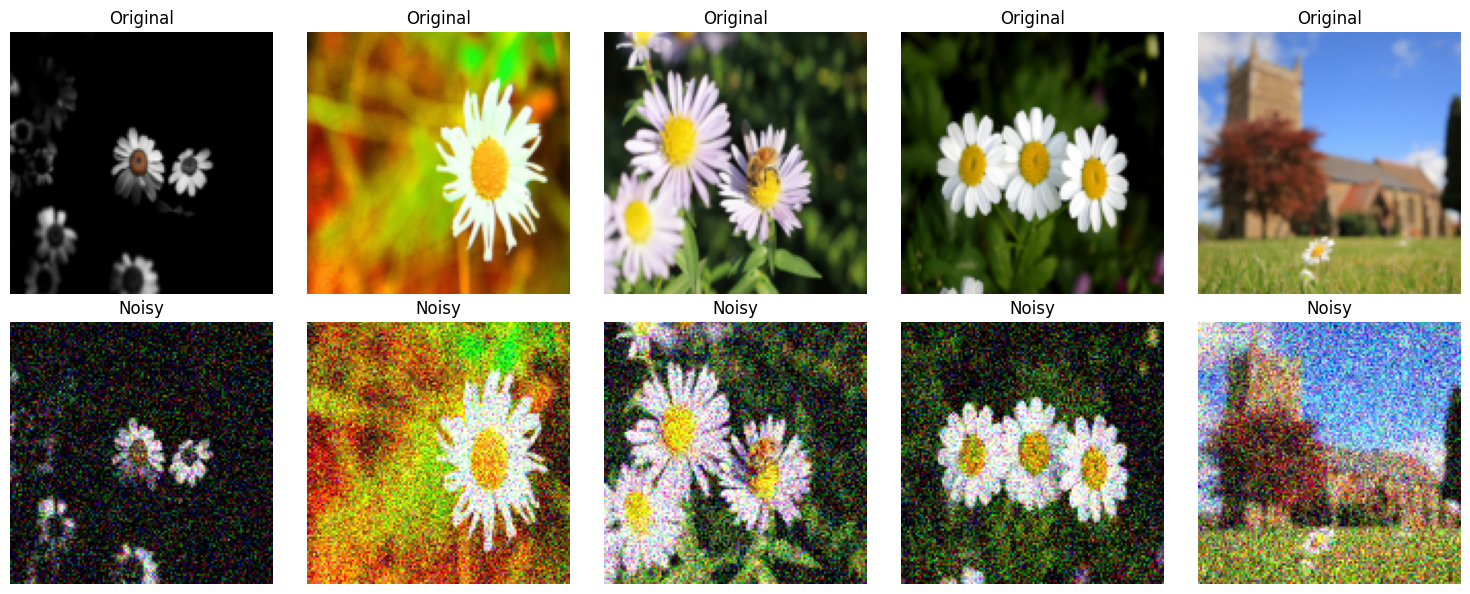


Experimenting with different noise levels...


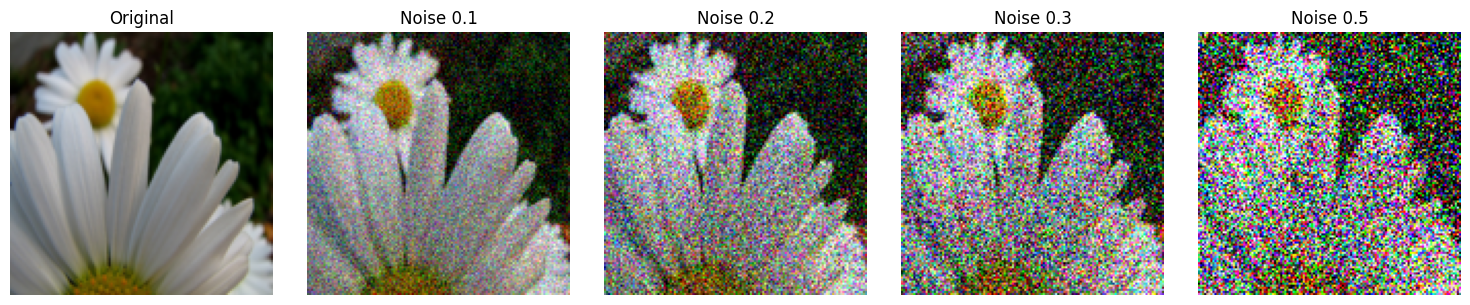


Dataset is ready in directory: flower_images


In [6]:
import tensorflow as tf
import pathlib
import os
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import random
import shutil
import requests
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim


def download_flower_photos():
    """Download the flower photos dataset and extract it"""
    print("Downloading flower photos dataset...")
    dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
    data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
    data_dir = pathlib.Path(data_dir)
    
    
    simplified_dir = 'flower_images'
    if os.path.exists(simplified_dir):
        shutil.rmtree(simplified_dir)
    os.makedirs(simplified_dir)
    
    
    print("Preparing dataset...")
    count = 0
    for img_path in data_dir.glob('*/*.jpg'):
        if count < 1000:  # Limit to 500 images for faster processing
            shutil.copy(str(img_path), os.path.join(simplified_dir, f"flower_{count}.jpg"))
            count += 1
    
    print(f"Downloaded and prepared {count} images in {simplified_dir}")
    return simplified_dir

class ImageDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        self.image_files = [f for f in os.listdir(image_dir) 
                          if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        
    def __len__(self):
        return len(self.image_files)
    
    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        image_path = os.path.join(self.image_dir, img_name)
        image = Image.open(image_path).convert('RGB')
        
        if self.transform:
            image = self.transform(image)
            
        return image, img_name

def add_noise(image, noise_factor=0.2):
    noisy_image = image + noise_factor * torch.randn(*image.shape)
    return torch.clip(noisy_image, 0., 1.)

def visualize_dataset(data_dir, num_images=5):
    """Visualize some random images from the dataset"""
    transform = transforms.Compose([
        transforms.Resize((128, 128)),
        transforms.ToTensor()
    ])
    
    dataset = ImageDataset(data_dir, transform=transform)
    dataloader = DataLoader(dataset, batch_size=num_images, shuffle=True)
    
    images, filenames = next(iter(dataloader))
    
    fig, axes = plt.subplots(2, num_images, figsize=(15, 6))
    
    for i in range(num_images):
        
        img = images[i].permute(1, 2, 0)
        axes[0, i].imshow(img)
        axes[0, i].axis('off')
        axes[0, i].set_title('Original')
        
        
        noisy_img = add_noise(images[i])
        axes[1, i].imshow(noisy_img.permute(1, 2, 0))
        axes[1, i].axis('off')
        axes[1, i].set_title('Noisy')
    
    plt.tight_layout()
    plt.show()

def experiment_with_noise_levels(data_dir):
    """Experiment with different noise levels on a single image"""
    transform = transforms.Compose([
        transforms.Resize((128, 128)),
        transforms.ToTensor()
    ])
    
    
    image_files = os.listdir(data_dir)
    image_path = os.path.join(data_dir, random.choice(image_files))
    image = Image.open(image_path).convert('RGB')
    image_tensor = transform(image)
    
    noise_levels = [0.1, 0.2, 0.3, 0.5]
    
    fig, axes = plt.subplots(1, len(noise_levels) + 1, figsize=(15, 3))
    
    
    axes[0].imshow(image_tensor.permute(1, 2, 0))
    axes[0].axis('off')
    axes[0].set_title('Original')
    
    
    for i, noise_factor in enumerate(noise_levels, 1):
        noisy_image = add_noise(image_tensor, noise_factor)
        axes[i].imshow(noisy_image.permute(1, 2, 0))
        axes[i].axis('off')
        axes[i].set_title(f'Noise {noise_factor}')
    
    plt.tight_layout()
    plt.show()

def main():
    
    data_dir = download_flower_photos()
    
    print("\nVisualizing random images from the dataset with noise...")
    visualize_dataset(data_dir)
    
    print("\nExperimenting with different noise levels...")
    experiment_with_noise_levels(data_dir)
    
    return data_dir

if __name__ == '__main__':
    data_dir = main()
    print(f"\nDataset is ready in directory: {data_dir}")

Found 1000 images in flower_images
Using device: cpu


Epoch 1/10: 100%|██████████| 32/32 [01:33<00:00,  2.92s/it, loss=0.0113]


Epoch [1/10], Loss: 0.023933


Epoch 2/10: 100%|██████████| 32/32 [01:14<00:00,  2.34s/it, loss=0.0138] 


Epoch [2/10], Loss: 0.010481


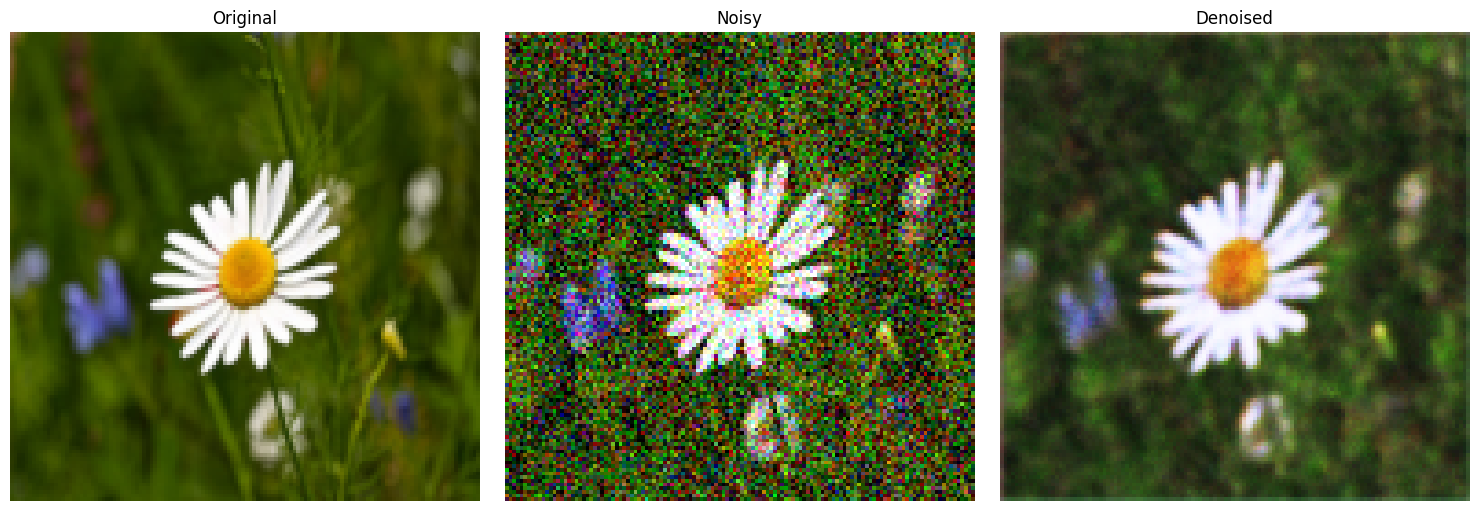

Epoch 3/10: 100%|██████████| 32/32 [01:11<00:00,  2.23s/it, loss=0.0097] 


Epoch [3/10], Loss: 0.008169


Epoch 4/10: 100%|██████████| 32/32 [01:12<00:00,  2.27s/it, loss=0.00695]


Epoch [4/10], Loss: 0.006934


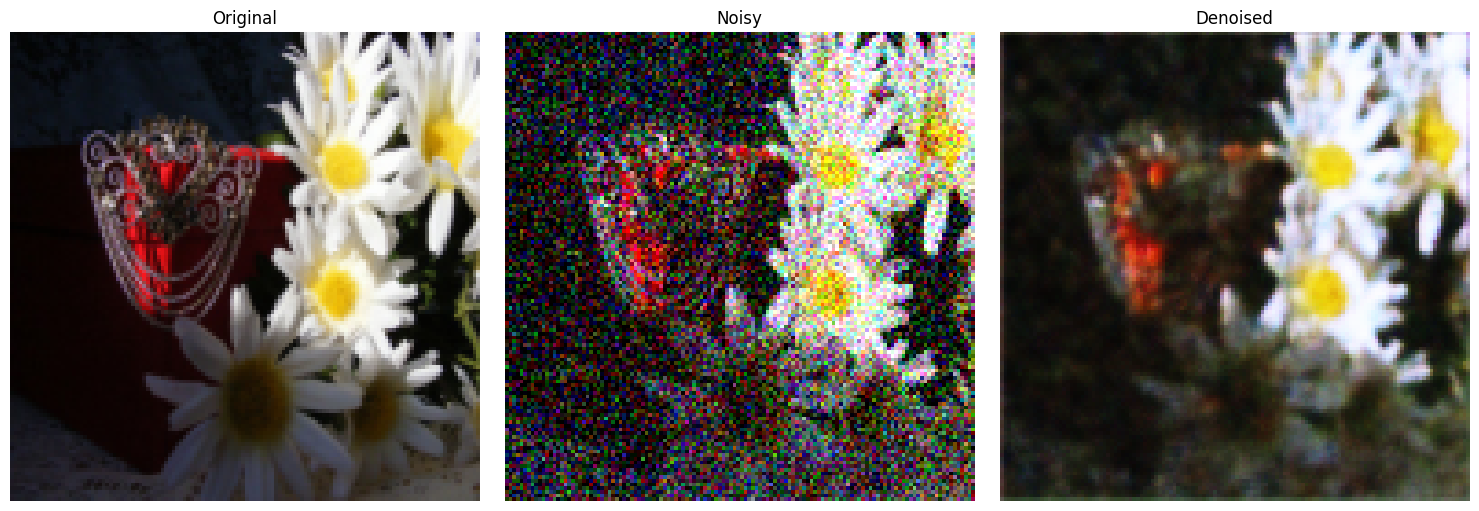

Epoch 5/10: 100%|██████████| 32/32 [01:12<00:00,  2.25s/it, loss=0.00727]


Epoch [5/10], Loss: 0.006032


Epoch 6/10: 100%|██████████| 32/32 [01:13<00:00,  2.30s/it, loss=0.00484]


Epoch [6/10], Loss: 0.005513


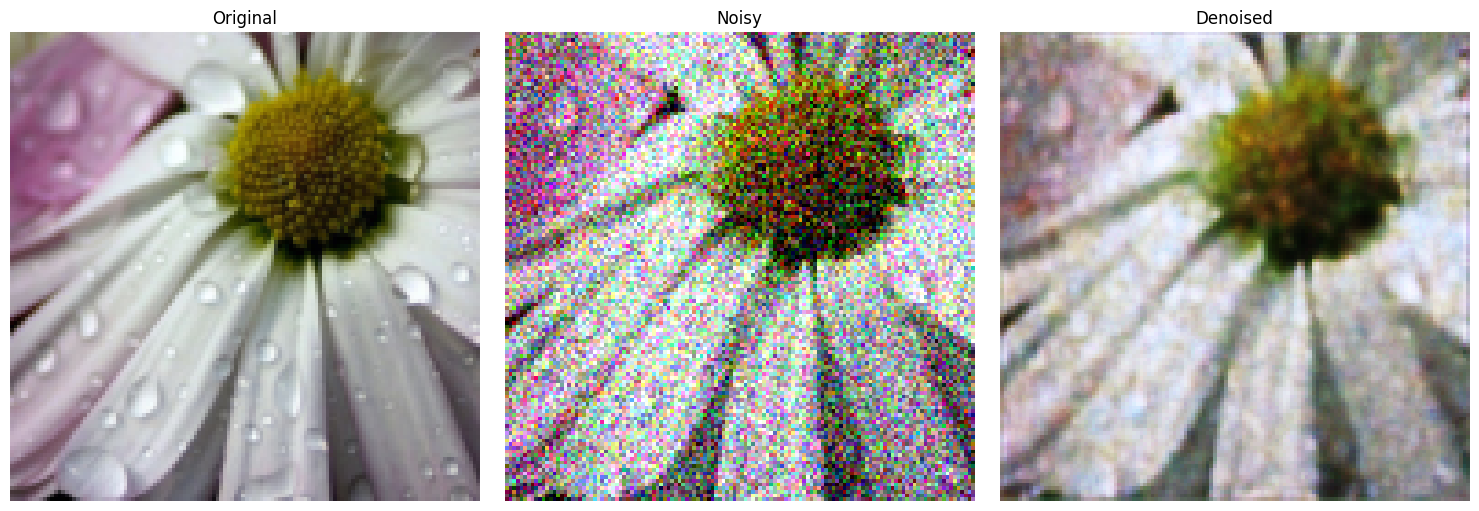

Epoch 7/10: 100%|██████████| 32/32 [01:14<00:00,  2.33s/it, loss=0.0144] 


Epoch [7/10], Loss: 0.005473


Epoch 8/10: 100%|██████████| 32/32 [01:12<00:00,  2.26s/it, loss=0.0087] 


Epoch [8/10], Loss: 0.005162


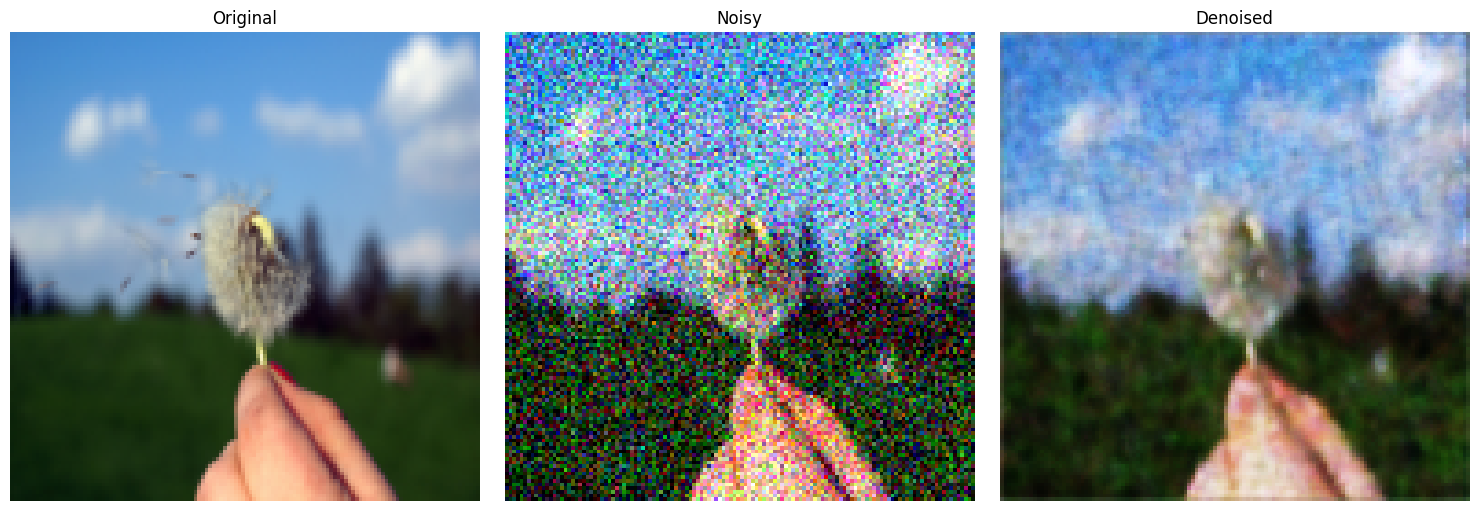

Epoch 9/10: 100%|██████████| 32/32 [01:13<00:00,  2.30s/it, loss=0.00985]


Epoch [9/10], Loss: 0.005195


Epoch 10/10: 100%|██████████| 32/32 [01:12<00:00,  2.26s/it, loss=0.00787]


Epoch [10/10], Loss: 0.005020


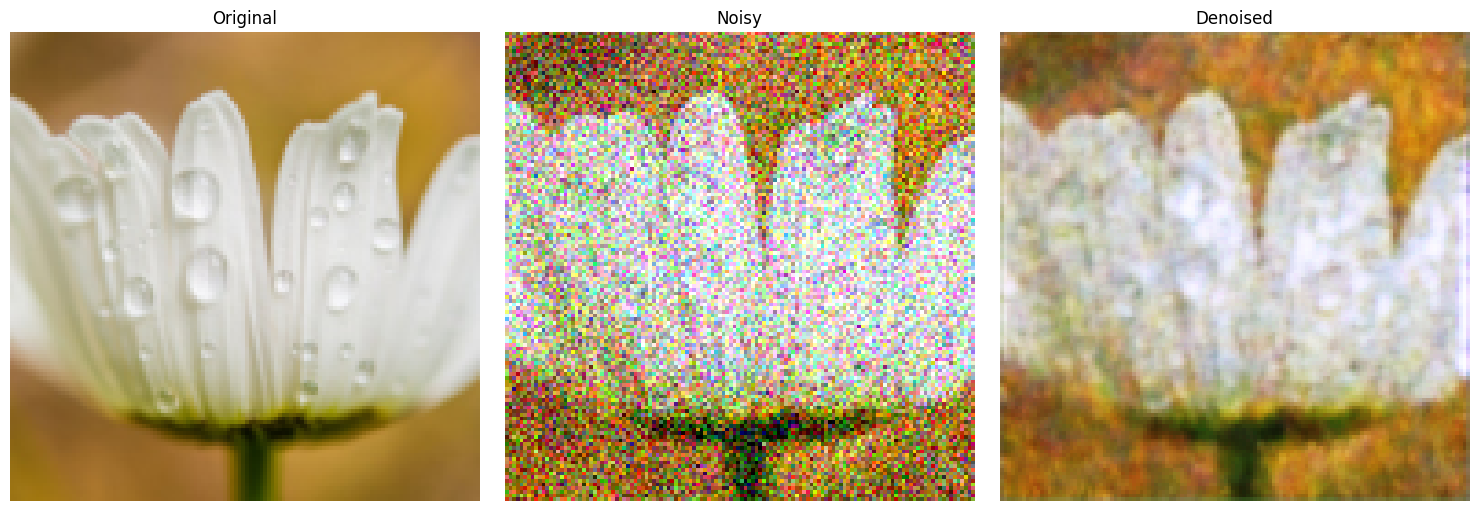

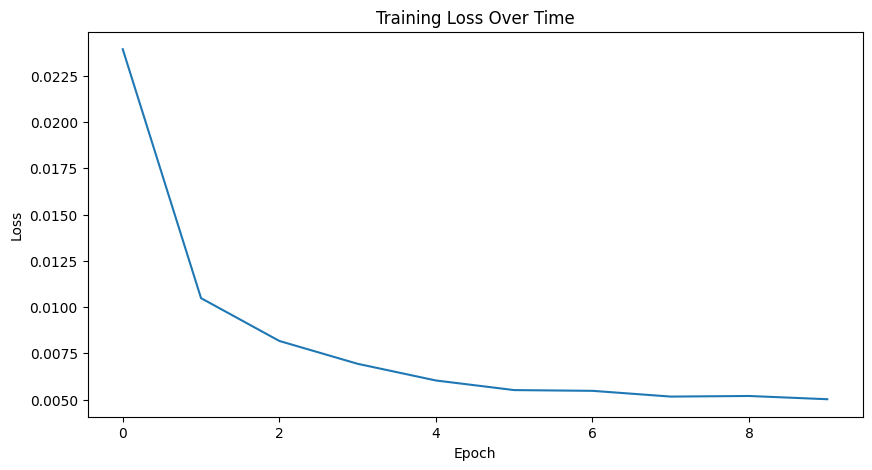

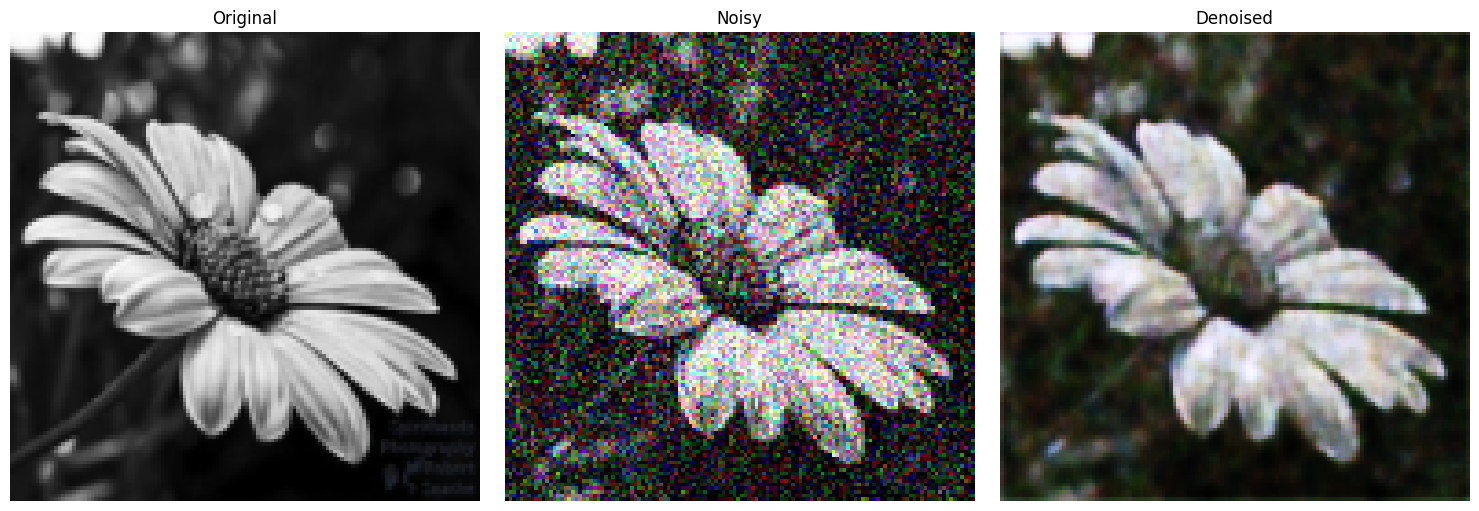

In [13]:
class ImageDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        self.image_files = [f for f in os.listdir(image_dir) 
                          if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    
    def __len__(self):
        return len(self.image_files)
    
    def __getitem__(self, idx):
        try:
            img_name = self.image_files[idx]
            image_path = os.path.join(self.image_dir, img_name)
            image = Image.open(image_path).convert('RGB')
            
            if self.transform:
                image = self.transform(image)
            
            return image
        except Exception as e:
            print(f"Error loading image {img_name}: {str(e)}")
            
            return torch.zeros((3, 128, 128))

class Denoiser(nn.Module):
    def __init__(self):
        super(Denoiser, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(True),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 16, kernel_size=3, padding=1),
            nn.ReLU(True),
            nn.BatchNorm2d(16)
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(True),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 3, kernel_size=3, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

def add_noise(images, noise_factor=0.2):
    noisy_images = images + noise_factor * torch.randn(*images.shape)
    return torch.clip(noisy_images, 0., 1.)

def train_denoiser(data_dir, num_epochs=10):
    
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")
    
    
    transform = transforms.Compose([
        transforms.Resize((128, 128)),
        transforms.ToTensor()
    ])
    
    
    dataset = ImageDataset(data_dir, transform=transform)
    
    dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=0)
    
    
    model = Denoiser().to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    
    train_losses = []
    
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        progress_bar = tqdm(dataloader, desc=f'Epoch {epoch+1}/{num_epochs}')
        
        for batch in progress_bar:
            try:
                
                clean_images = batch.to(device)
                
                
                noisy_images = add_noise(clean_images)
                
                
                outputs = model(noisy_images)
                loss = criterion(outputs, clean_images)
                
               
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                
                
                running_loss += loss.item()
                progress_bar.set_postfix({'loss': loss.item()})
                
            except Exception as e:
                print(f"Error in training batch: {str(e)}")
                continue
        
        
        epoch_loss = running_loss / len(dataloader)
        train_losses.append(epoch_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.6f}')
        
        
        if (epoch + 1) % 2 == 0:
            visualize_results(model, dataset, device)
    
    # Plot training losses
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses)
    plt.title('Training Loss Over Time')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()
    
    return model

def visualize_results(model, dataset, device):
    model.eval()
    with torch.no_grad():
       
        idx = torch.randint(0, len(dataset), (1,)).item()
        clean_image = dataset[idx].unsqueeze(0).to(device)
        
        
        noisy_image = add_noise(clean_image)
        denoised_image = model(noisy_image)
        
        
        clean_image = clean_image.cpu().squeeze(0).permute(1, 2, 0)
        noisy_image = noisy_image.cpu().squeeze(0).permute(1, 2, 0)
        denoised_image = denoised_image.cpu().squeeze(0).permute(1, 2, 0)
        
       
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        axes[0].imshow(clean_image)
        axes[0].set_title('Original')
        axes[0].axis('off')
        
        axes[1].imshow(noisy_image)
        axes[1].set_title('Noisy')
        axes[1].axis('off')
        
        axes[2].imshow(denoised_image)
        axes[2].set_title('Denoised')
        axes[2].axis('off')
        
        plt.tight_layout()
        plt.show()


if __name__ == '__main__':
    try:
        data_dir = 'flower_images'  
        
       
        if not os.path.exists(data_dir):
            raise FileNotFoundError(f"Directory {data_dir} not found")
            
    
        image_files = [f for f in os.listdir(data_dir) 
                      if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        if not image_files:
            raise Exception(f"No image files found in {data_dir}")
            
        print(f"Found {len(image_files)} images in {data_dir}")
        
      
        model = train_denoiser(data_dir, num_epochs=10)
        
        
        torch.save(model.state_dict(), 'denoiser_model.pth')
        
       
        test_image_path = os.path.join(data_dir, image_files[0])
        model.eval()
        transform = transforms.Compose([
            transforms.Resize((128, 128)),
            transforms.ToTensor()
        ])
       
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
        image = Image.open(test_image_path).convert('RGB')
        clean_image = transform(image).unsqueeze(0).to(device)
        noisy_image = add_noise(clean_image)
        
        with torch.no_grad():
            denoised_image = model(noisy_image)
        
    
        visualize_results(model, ImageDataset(data_dir, transform), device)
        
    except Exception as e:
        print(f"An error occurred: {str(e)}")

Using device: cpu


C:\Users\lenonvo\AppData\Local\Temp\ipykernel_5600\2974519921.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=

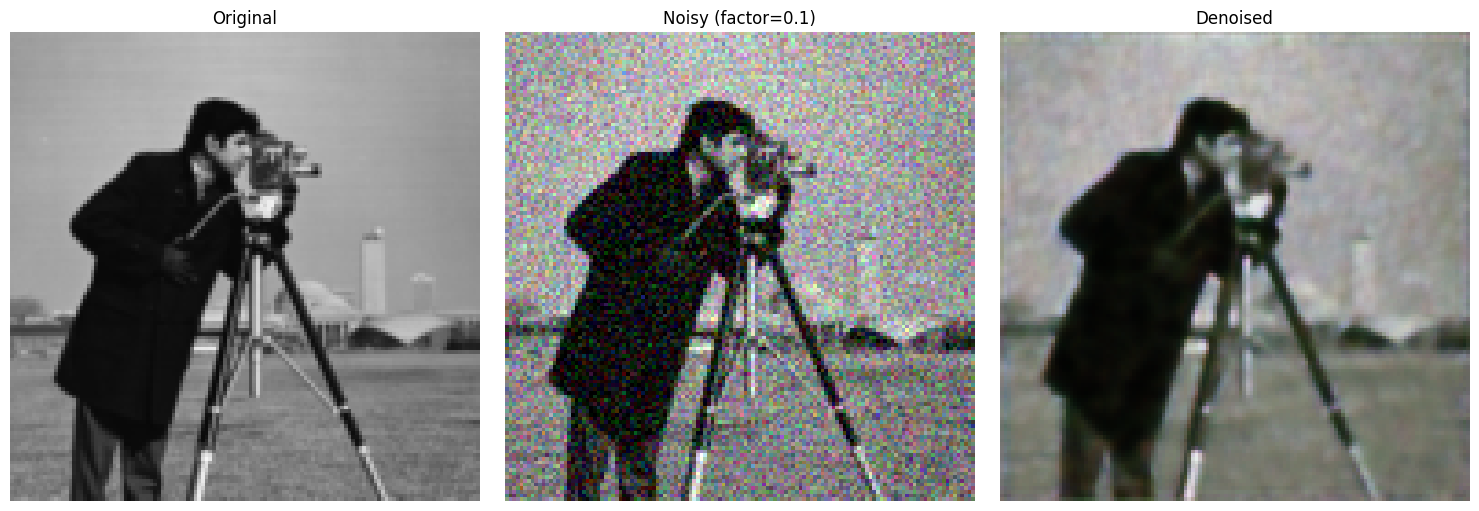

Error processing image: pic should not have > 4 channels. Got 128 channels.


In [14]:
def add_noise(images, noise_factor=0.2):
    noisy_images = images + noise_factor * torch.randn(*images.shape)
    return torch.clip(noisy_images, 0., 1.)

def denoise_image(model_path, image_path, noise_factor=0.2):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")
    
    
    model = Denoiser()  
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.to(device)
    model.eval()
    
    # Prepare image transform
    transform = transforms.Compose([
        transforms.Resize((128, 128)),
        transforms.ToTensor()
    ])
    
    try:
       
        image = Image.open(image_path).convert('RGB')
        original_size = image.size 
        
       
        image_tensor = transform(image).unsqueeze(0).to(device)
        
       
        noisy_image = add_noise(image_tensor, noise_factor)
        
       
        with torch.no_grad():
            denoised_image = model(noisy_image)
        
        
        original_image = image_tensor.cpu().squeeze(0).permute(1, 2, 0)
        noisy_image = noisy_image.cpu().squeeze(0).permute(1, 2, 0)
        denoised_image = denoised_image.cpu().squeeze(0).permute(1, 2, 0)
        
        
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        
        axes[0].imshow(original_image)
        axes[0].set_title('Original')
        axes[0].axis('off')
        
        axes[1].imshow(noisy_image)
        axes[1].set_title(f'Noisy (factor={noise_factor})')
        axes[1].axis('off')
        
        axes[2].imshow(denoised_image)
        axes[2].set_title('Denoised')
        axes[2].axis('off')
        
        plt.tight_layout()
        plt.show()
        
        
        denoised_image_pil = transforms.ToPILImage()(denoised_image)
        denoised_image_pil = denoised_image_pil.resize(original_size) 
        save_path = os.path.splitext(image_path)[0] + '_denoised.png'
        denoised_image_pil.save(save_path)
        print(f"Denoised image saved as: {save_path}")
        
    except Exception as e:
        print(f"Error processing image: {str(e)}")


if __name__ == "__main__":
    
    model_path = 'denoiser_model.pth'  
    image_path = 'test_images/cameraman.tif'  
    denoise_image(model_path, image_path, noise_factor=0.1)

Using device: cpu


C:\Users\lenonvo\AppData\Local\Temp\ipykernel_5600\2974519921.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=

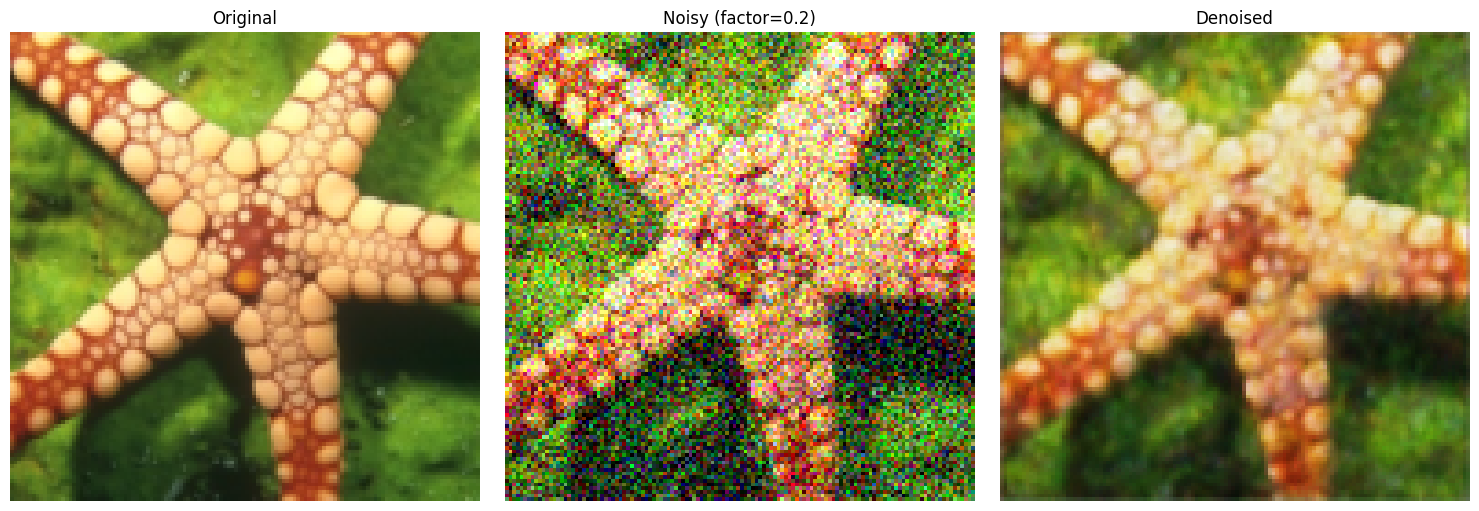

Error processing image: pic should not have > 4 channels. Got 128 channels.


In [15]:
image_path = 'test_images/starfish.tif'
denoise_image(model_path, image_path, noise_factor=0.2)